In [53]:
from Project.Data_Cleaning import clean_data
from Project.GDP_Pop_Extraction.extraction import extract_data

df = extract_data()

#This operation takes about 1.5 minutes on an average laptop, the modified dataset
#can be read from the main directory if we are not focusing on this part
data = clean_data.CleanData(df) # Use cd.CleanData(log_level = 0) to see logging messages
#The main source of the wait time is __decimal_fix in the init function
modified = data.modified
NaN = data.NaN
NoNaN = data.NoNaN
feature_tables = data.feature_tables

#To create csvs from the results of data cleaning
#data.create_csvs()

In [2]:
# A sample slice of the dataset
#To bypass the wait time above, comment the upper part, uncomment the lines below
#****WARNING***** The PCA and map_display functions requires the CleanData object above
import pandas as pd
modified = pd.read_csv('output/modified.csv')
modified = modified.drop('Unnamed: 0',axis = 1)

In [3]:
print('\nBelow there is a sample from the modified dataset')
modified


Below there is a sample from the modified dataset


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,1.0,65.0,263.0,62.0,0.01,71.279625,65.0,1154.000,...,60.0,8.16,65.0,0.1,569.57794,33.736492,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,1.0,59.9,271.0,64.0,0.01,73.523580,62.0,492.000,...,58.0,8.18,62.0,0.1,629.34530,32.758020,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,1.0,59.9,268.0,66.0,0.01,73.219246,64.0,430.000,...,62.0,8.13,64.0,0.1,638.61255,31.731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,1.0,59.5,272.0,69.0,0.01,78.184210,67.0,278.700,...,67.0,8.52,67.0,0.1,669.00903,30.696959,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,1.0,59.2,275.0,71.0,0.01,70.971085,68.0,301.300,...,68.0,7.87,68.0,0.1,603.53705,29.708600,18.2,18.2,0.454,9.5
5,Afghanistan,2010.0,1.0,58.8,279.0,74.0,0.01,79.679370,66.0,198.900,...,66.0,9.20,66.0,0.1,553.30030,28.803167,18.4,18.4,0.448,9.2
6,Afghanistan,2009.0,1.0,58.6,281.0,77.0,0.01,56.762220,63.0,286.100,...,63.0,9.42,63.0,0.1,445.89330,28.004332,18.6,18.7,0.434,8.9
7,Afghanistan,2008.0,1.0,58.1,287.0,80.0,0.03,25.873926,64.0,159.900,...,64.0,8.33,64.0,0.1,373.36110,27.294031,18.8,18.9,0.433,8.7
8,Afghanistan,2007.0,1.0,57.5,295.0,82.0,0.02,10.910156,63.0,114.100,...,63.0,6.73,63.0,0.1,369.83580,26.616793,19.0,19.1,0.415,8.4
9,Afghanistan,2006.0,1.0,57.3,295.0,84.0,0.03,17.171518,64.0,199.000,...,58.0,7.43,58.0,0.1,272.56308,25.893450,19.2,19.3,0.405,8.1


In [4]:
from Project.PCA import pca_analysis

result_pca = pca_analysis.PCA_Analysis(data)

eig_vals = result_pca.eig_vals
Nmin = pca_analysis.calnum(eig_vals)
print(f'Minimum number of eigen values for the subsace to provide enough (85%) information: {Nmin}\n')

x = result_pca.x
finalDf = result_pca.finalDf
features = result_pca.features

pcoef, finalcomp = pca_analysis.calcoefficient(x,finalDf,features)


print('The 5 different feature combinations obtained from PCA are shown below.')
print('In each combination there are 4 positive and 4 negative components.\n')
for index,i in enumerate(finalcomp):
    print(f'{index+1} - ', end =" ")
    for j in i:
        print(j,end =", ")
    print('')
    
print('\nWe will use these results to determine the most relevant features.')

Minimum number of eigen values for the subsace to provide enough (85%) information: 9

The 5 different feature combinations obtained from PCA are shown below.
In each combination there are 4 positive and 4 negative components.

1 -  Measles, Adult Mortality, under-five deaths, infant deaths, Diphtheria, BMI, percentage expenditure, GDP, 
2 -  Measles, GDP, percentage expenditure, under-five deaths, Income composition of resources, Hepatitis B,  HIV/AIDS, Adult Mortality, 
3 -  Measles, GDP, percentage expenditure, Adult Mortality, infant deaths, Hepatitis B, Diphtheria, Population, 
4 -  Measles, Adult Mortality,  HIV/AIDS, Diphtheria, Income composition of resources, BMI, percentage expenditure, GDP, 
5 -  Measles, Adult Mortality, under-five deaths, Diphtheria, Polio, Hepatitis B, percentage expenditure, GDP, 

We will use these results to determine the most relevant features.


D:\Users\ericl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


['Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


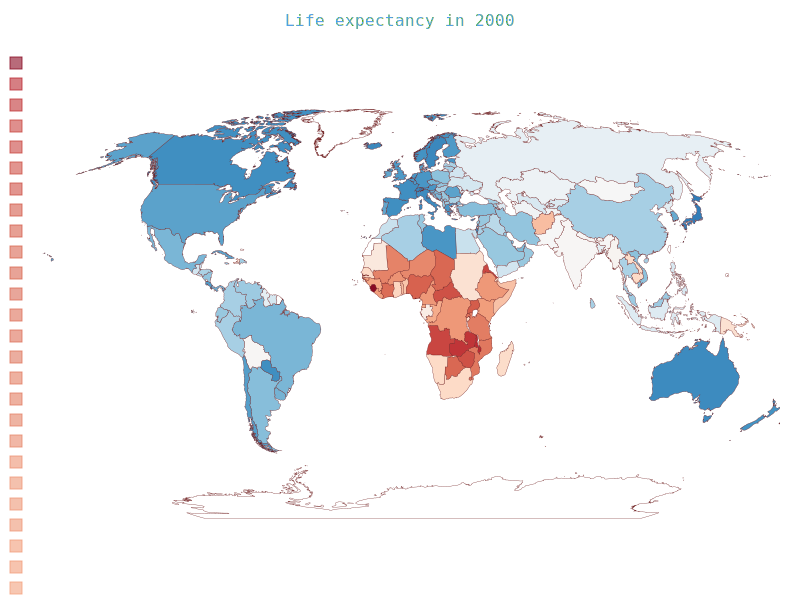

In [5]:
from Project.Map_Display import map_display
from IPython.display import SVG

features = list(modified.columns)
features.remove('Country')
features.remove('Year')
print(features)

map_display.displaymap(data,features[1], 2000)

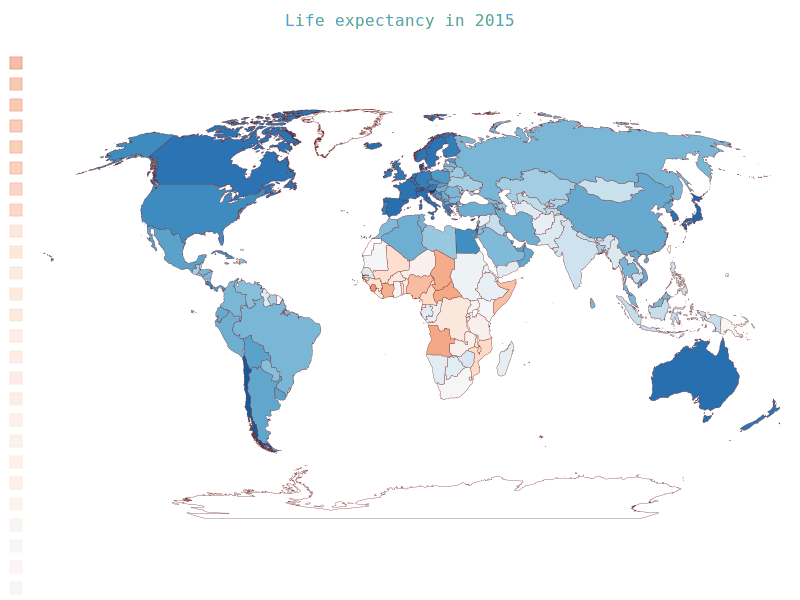

In [6]:
map_display.displaymap(data,features[1], 2015)

In [7]:
#map_display.display(data,features[3], 2013)
#map_display.display(data,features[4], 2012)

C:\Users\ericl\Documents\GitHub\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:124: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  newdata = data2000.sort_index(by='Life expectancy ')
C:\Users\ericl\Documents\GitHub\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:25: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by=feature)


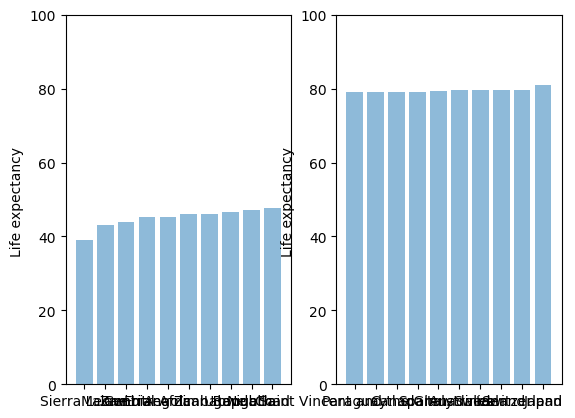

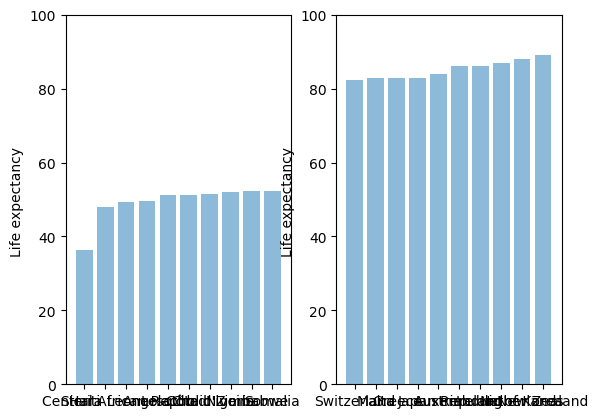

C:\Users\ericl\Documents\GitHub\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:87: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


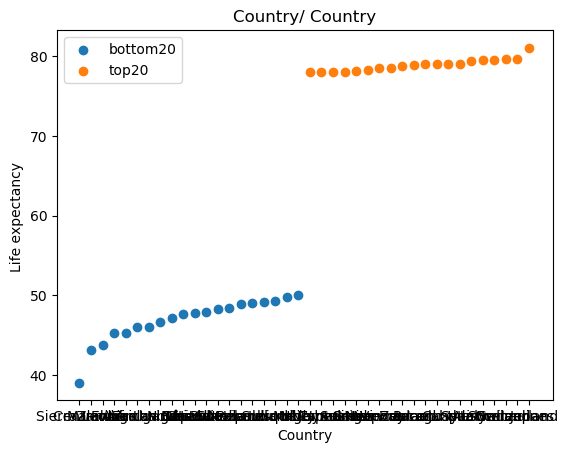

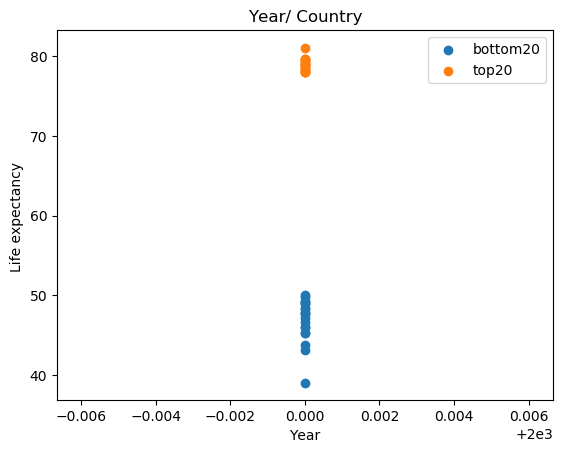

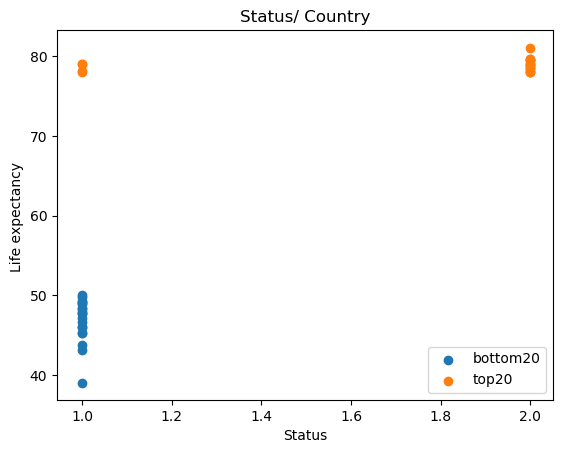

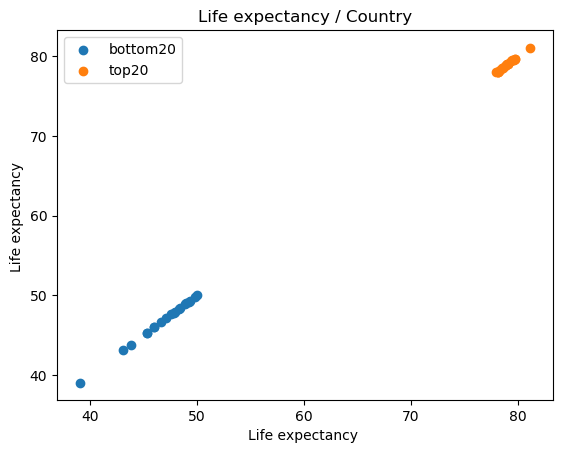

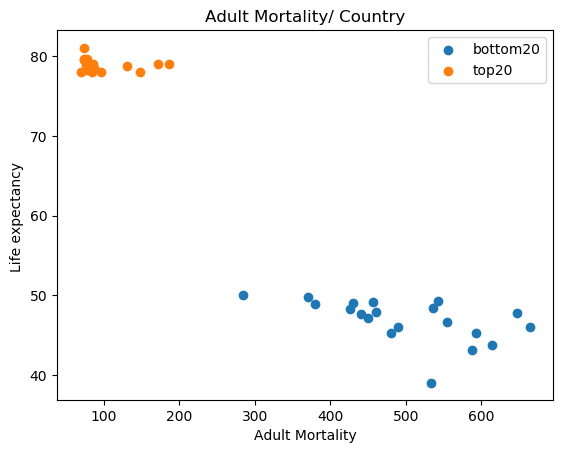

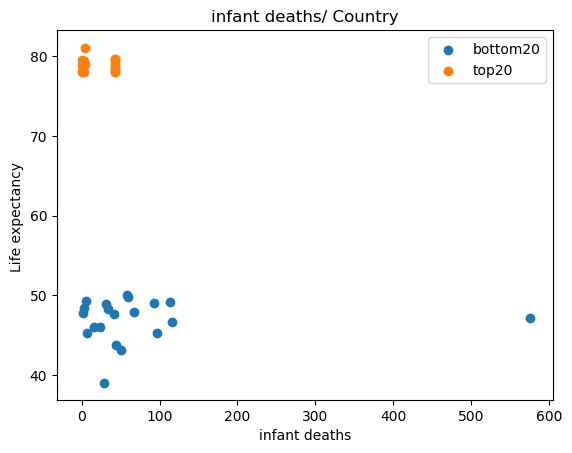

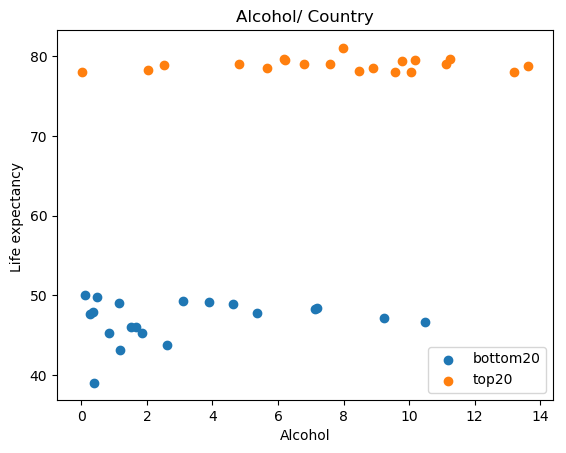

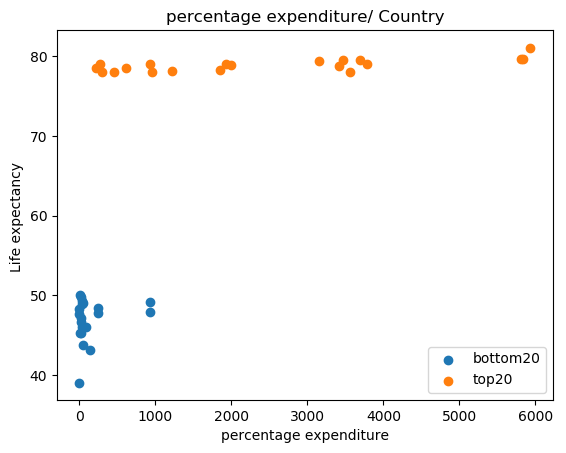

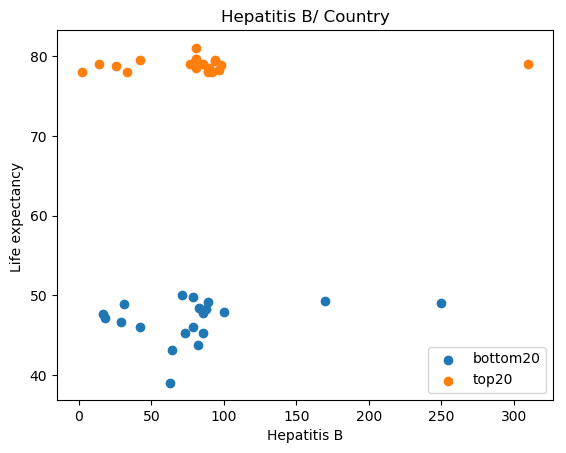

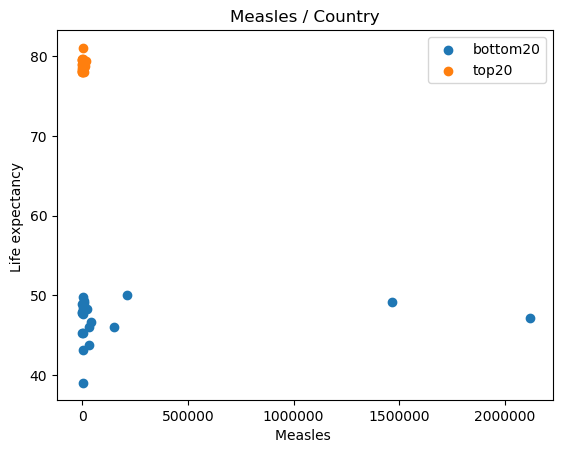

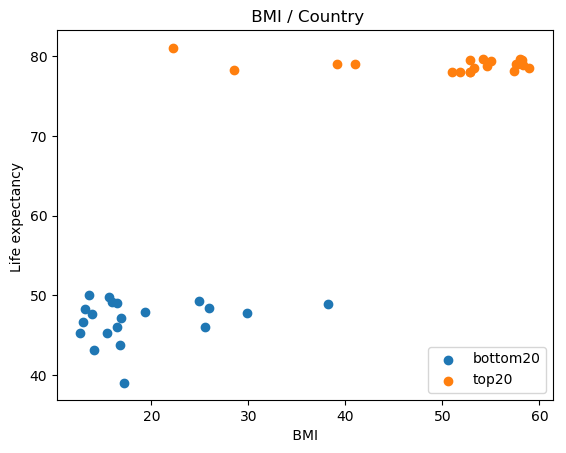

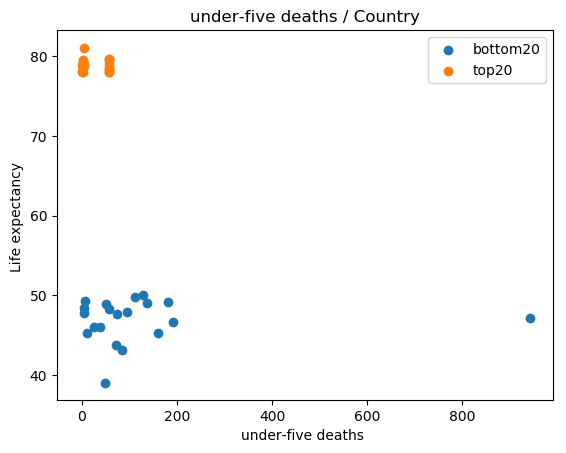

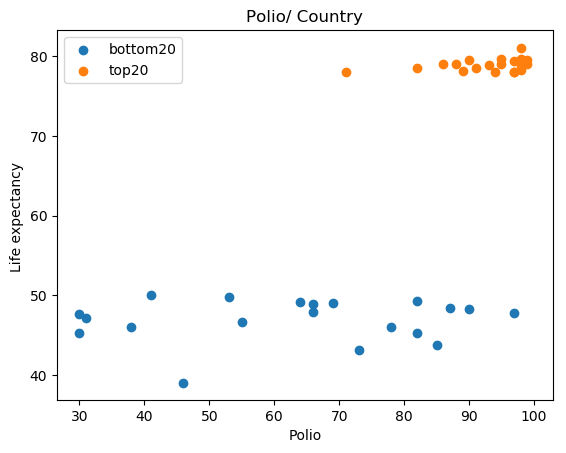

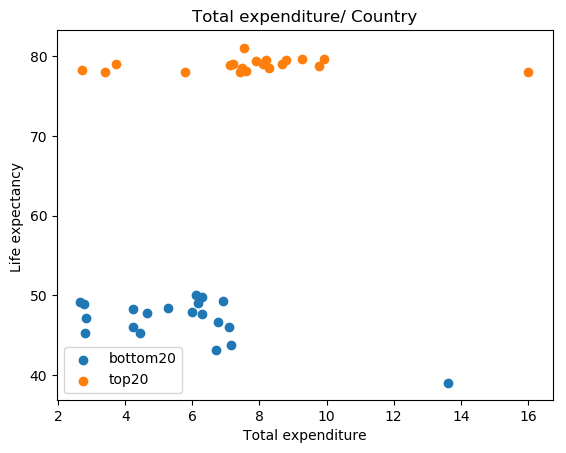

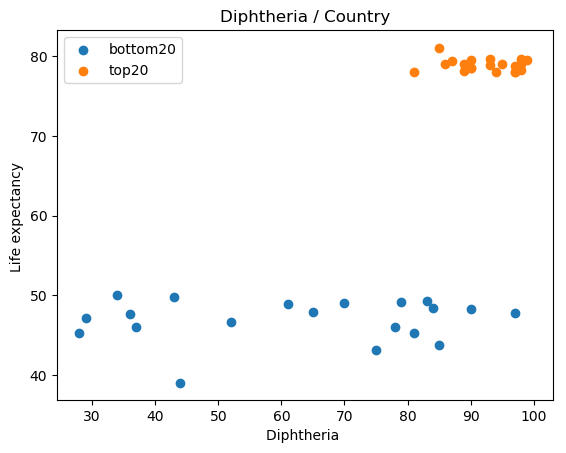

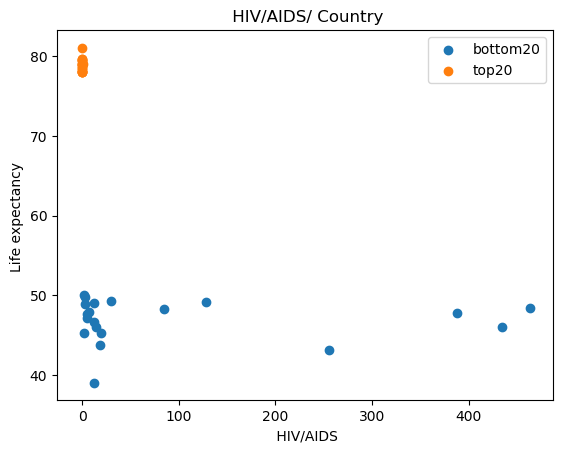

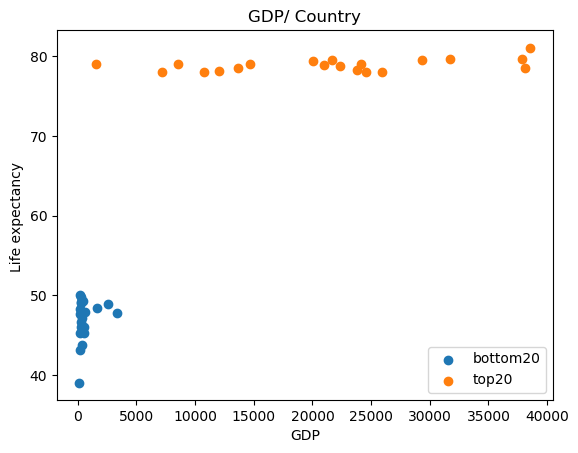

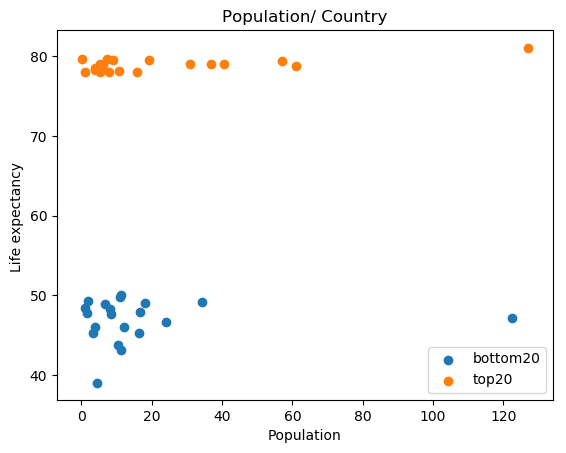

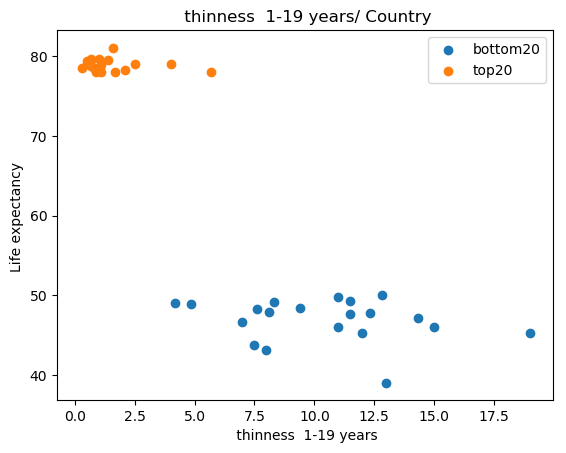

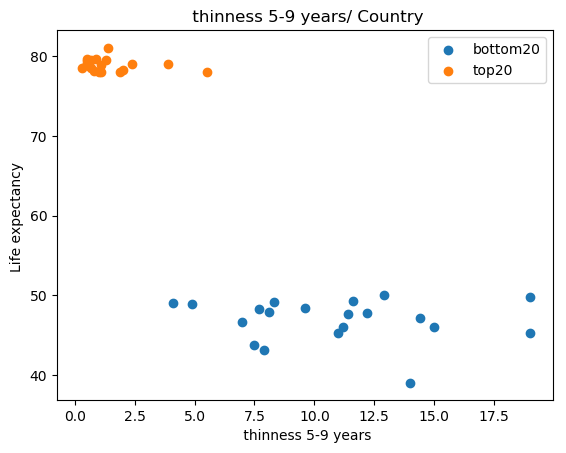

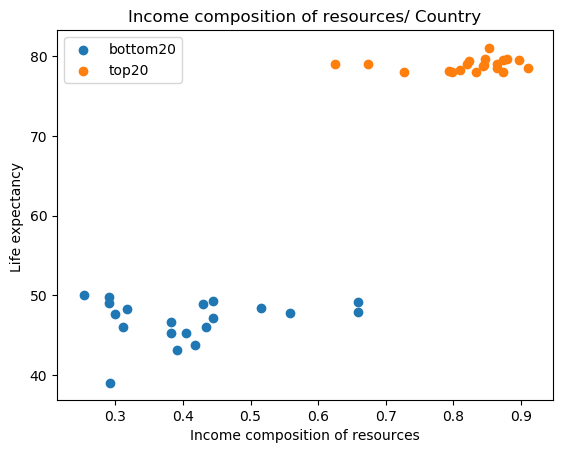

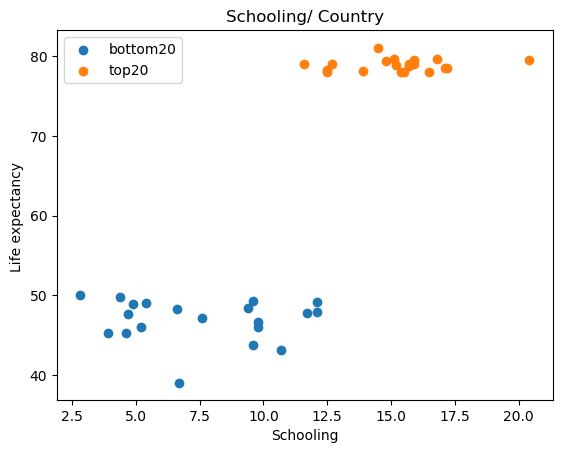

In [8]:
from Project.Map_Display.analysis_part1 import analysis

#The below function prints raw output, which is the first step of our analysis
analysis(modified)

In [54]:
from Project.Map_Display.analysis_part1 import sortdata
from altair import Chart, load_dataset
import altair as alt
alt.renderers.enable('notebook')

#below shows the plots we present for countries with best and worst life expectancy.

rankdata=sortdata(modified,2015,15)


C:\Users\ericl\Documents\GitHub\ECE143-Life-expectancy\Project\Map_Display\analysis_part1.py:62: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  data=data.sort_index(by='Life expectancy ')


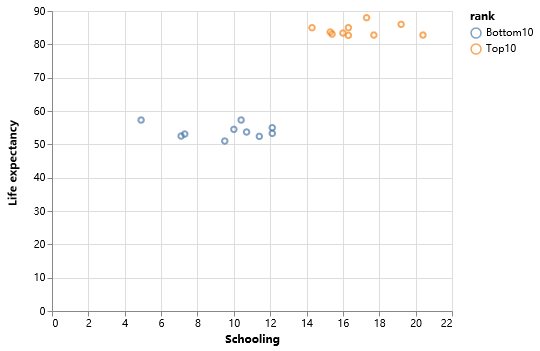

In [42]:
alt.Chart(rankdata).mark_point().encode(x='Schooling',y='Life expectancy ',color='rank')

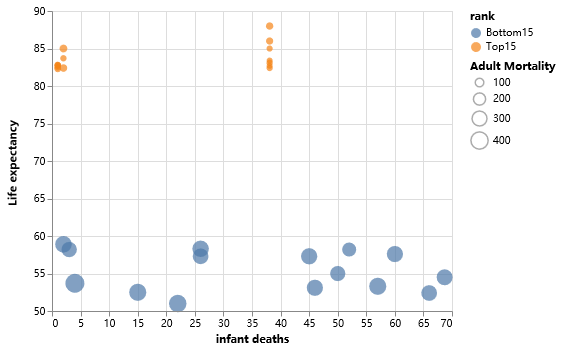

In [55]:
#plot infant death, adult mortality and life expectancy
alt.Chart(rankdata).mark_circle().encode(
    alt.X('infant deaths', scale=alt.Scale(zero=False)),
    alt.Y('Life expectancy ', scale=alt.Scale(zero=False, padding=1)),
    color='rank',
    size='Adult Mortality'
)
# The adult mortality rate shown in the World Development Indicators (WDI) 
# database and related products refers to the probability that those who have reached age 
# 15 will die before reaching age 60 (shown per 1,000 persons).

#Infant deaths means the probability that those who die before 12month, per 1,000 persons. From WHO

In [50]:
rankdata

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,rank
1632,Malta,2015.0,2.0,81.699997,54.0,39.180622,8.490000,409.600037,95.000000,2.000000,...,9.750000,97.0,0.1,23759.029297,0.445053,0.800000,0.800000,0.853000,14.600000,Top20
1904,Norway,2015.0,2.0,81.800003,59.0,39.180622,5.970000,1776.382935,80.960838,14.000000,...,9.720000,95.0,0.1,74563.039062,5.190239,0.800000,0.700000,0.948000,17.700001,Top20
1824,Netherlands,2015.0,2.0,81.900002,57.0,1.000000,10.000000,1491.703613,9.400000,700.000000,...,19.000000,95.0,0.1,44746.367188,16.939922,1.000000,0.900000,0.923000,18.100000,Top20
1536,Luxembourg,2015.0,2.0,82.000000,63.0,39.180622,11.120000,16255.162109,94.000000,2.000000,...,6.940000,99.0,0.1,101446.789062,0.569604,1.000000,0.900000,0.896000,13.900000,Top20
496,Canada,2015.0,2.0,82.199997,64.0,2.000000,8.100000,10219.021484,55.000000,195.000000,...,14.500000,91.0,0.1,43535.878906,35.832512,0.600000,0.500000,0.919000,16.299999,Top20
2080,Republic of Korea,2015.0,2.0,82.300003,64.0,1.000000,10.000000,933.531616,98.000000,7000.000000,...,7.370000,98.0,0.1,27050.894531,51.014946,1.500000,1.000000,0.658338,12.113420,Top20
2496,Sweden,2015.0,2.0,82.400002,53.0,39.180622,7.300000,11422.124023,67.000000,22.000000,...,11.930000,98.0,0.1,50820.546875,9.799186,1.500000,1.400000,0.909000,15.900000,Top20
928,France,2015.0,2.0,82.400002,78.0,2.000000,11.500000,6739.677734,86.000000,1570.000000,...,11.540000,98.0,0.1,36640.285156,66.593369,0.700000,0.600000,0.894000,16.299999,Top20
1264,Israel,2015.0,2.0,82.500000,58.0,1.000000,2.620000,4348.335449,96.000000,80.000000,...,7.810000,95.0,0.1,35679.765625,8.380100,1.200000,1.100000,0.898000,16.000000,Top20
1168,Iceland,2015.0,2.0,82.699997,49.0,39.180622,7.450000,8254.020508,80.960838,3636.195312,...,8.860000,92.0,0.1,51213.660156,0.330815,1.000000,0.900000,0.919000,19.000000,Top20
